# Confusion Matrix

## Libraries

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.dummy import DummyClassifier

#Confustion Matrix
from sklearn.metrics import confusion_matrix

#
from sklearn.metrics import classification_report

## Reading the data

In [36]:
pwd = os.getcwd()
data = os.path.join(pwd, "data.csv")
df = pd.read_csv(data)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Feature and target selection

In [37]:
features = df[["Pclass", "Sex","Fare"]]
target = df[["Survived"]]

## Splitting Dataset

In [38]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42)

## Preprocessing

In [63]:
ct = ColumnTransformer([
    ("onehot", OneHotEncoder(sparse=False), ["Pclass", "Sex"]),
    ("scaling", StandardScaler(),["Fare"])
    ])

X_train_fit_trans = ct.fit_transform(X_train)
X_test_trans = ct.transform(X_test)

# Dummy Calssifier

In [64]:
#produce random output

dummy = DummyClassifier()
dummy.fit(X_train_fit_trans, np.ravel(y_train))
dummy.score(X_test_trans, y_test)

0.600896860986547

In [62]:
pred_dummy = dummy.predict(X_test_fit_trans)
print(classification_report(y_test, pred_dummy))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       134
           1       0.00      0.00      0.00        89

    accuracy                           0.60       223
   macro avg       0.30      0.50      0.38       223
weighted avg       0.36      0.60      0.45       223

/Users/royceto/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/royceto/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/

# KNN

In [74]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_fit_trans, np.ravel(y_train))
knn.score(X_test_trans, y_test)

0.7982062780269058

In [77]:
pred_knn = knn.predict(X_test_trans)
pred_knn

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0])

In [79]:
confusion_matrix(y_test, pred_knn)

array([[122,  12],
       [ 33,  56]])

In [80]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       134
           1       0.82      0.63      0.71        89

    accuracy                           0.80       223
   macro avg       0.81      0.77      0.78       223
weighted avg       0.80      0.80      0.79       223



# Logistic Regression

In [84]:
logreg = LogisticRegression(C=100)
logreg.fit(X_train_fit_trans, np.ravel(y_train))
logreg.score(X_test_trans, y_test)

0.7802690582959642

In [45]:
pred_logreg = logreg.predict(X_test_fit_trans)
pred_logreg

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0])

In [53]:

confusion_matrix(y_test, pred_logreg)

array([[111,  23],
       [ 26,  63]])

In [54]:
target_names = ['not survived', 'survived']
print(classification_report(y_test, pred_logreg, target_names=target_names))

              precision    recall  f1-score   support

not survived       0.81      0.83      0.82       134
    survived       0.73      0.71      0.72        89

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



In [87]:
#logreg.predict_proba(X_test_trans)
#logreg.decision_function(X_test_trans)


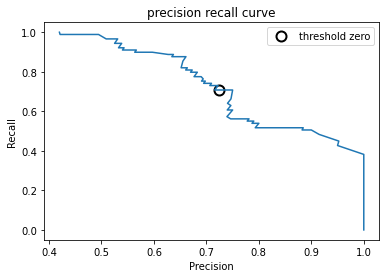

In [119]:
logreg.predict_proba(X_test_trans)
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

#what's .decsion_function
precision, recall, thresholds = precision_recall_curve(y_test, logreg.decision_function(X_test_trans))

#what's np.argmin, np.abs
close_zero = np.argmin(np.abs(thresholds))
 
plt.plot(
    precision[close_zero],
    recall[close_zero],
    "o",
    markersize=10,
    label="threshold zero",
    fillstyle="none",
    c="k",
    mew=2)

# #KNN
# precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y_test, knn.predict_proba(X_test_trans))

# plt.plot(precision_knn, recall_knn, label="knn")

# close_zero_knn = np.argmin(np.abs(thresholds_knn))
# plt.plot(precision_knn[close_zero_knn], recall_knn[close_zero_lsm],"^", c="k", markersize=10, label="threshold 0.5 knn", fillstyle="none",mew=2)


# #Linear Support Model
# precision_lsm, recall_lsm, thresholds_lsm = precision_recall_curve(y_test, linear_svm.decision_function(X_test_trans))

# plt.plot(precision_lsm, recall_lsm, labeL="lsm")

# close_zero_lsm = np.argmin(np.abs(thresholds_lsm))
# plt.plot(precision_lsm[close_zero_lsm], recall_lsm[close_zero_lsm],"^", c="k", markersize=10, label="threshold 0.5 lsm", fillstyle="none",mew=2)

plt.plot(precision, recall)
plt.title("precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [136]:
np.abs(thresholds)

array([3.71269033, 2.71269033, 2.20241706, 2.19920223, 1.60345644,
       1.60271172, 1.58334886, 1.563986  , 1.55653875, 0.46273539,
       0.45383592, 0.4535008 , 0.44709616, 0.43619845, 0.42693883,
       0.4205467 , 0.41770424, 0.4133601 , 0.41008331, 0.40340551,
       0.4033933 , 0.38889588, 0.38614039, 0.38380702, 0.38373255,
       0.38353386, 0.38342215, 0.03846196, 0.31103142, 0.43257059,
       0.47976145, 0.48565699, 0.4989131 , 0.51031991, 0.51194579,
       0.5135967 , 0.55381187, 0.56274857, 0.57221909, 0.57615362,
       0.57705981, 0.57913253, 0.58592204, 0.58940974, 0.5901917 ,
       0.66849956, 0.85539117, 0.98795227, 0.99688897, 1.03561469,
       1.04008304, 1.04306194, 1.0743404 , 2.07096962, 2.1368653 ,
       2.15615368, 2.17648468, 2.17812308, 2.19294311, 2.19384929,
       2.20993536, 2.21096546, 2.21101521, 2.21178466, 2.21496226,
       2.21528487, 2.21565723, 2.21574422, 2.21580618, 2.21586814,
       2.21604211, 2.21617854, 2.21693578, 2.21766799, 2.21772

In [138]:
np.argmin(np.abs(thresholds))
np.min(np.abs(thresholds))
 
 

0.03846196086546015

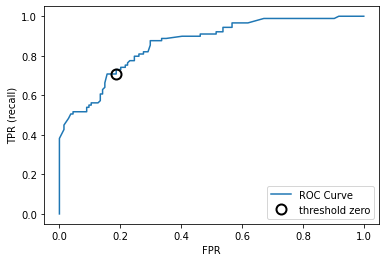

In [131]:
#ROC

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, logreg.decision_function(X_test_trans))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], "o", markersize=10, label="threshold zero", fillstyle="none", c="k", mew=2)
plt.legend(loc=4)

In [134]:
#auc

from sklearn.metrics import roc_auc_score

logreg_auc = roc_auc_score(y_test, logreg.decision_function(X_test_trans))

logreg_auc

0.8612694952205265

# Linear Support Model

In [48]:
linear_svm = LinearSVC(C=10, max_iter=100000)
linear_svm.fit(X_train_fit_trans, y_train.values.ravel())
linear_svm.score(X_test_fit_trans, y_test)

0.7847533632286996

In [49]:
pred_linear_svm = linear_svm.predict(X_test_fit_trans)
pred_linear_svm

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0])

In [50]:
confusion_matrix(y_test, pred_linear_svm)

array([[112,  22],
       [ 26,  63]])

In [51]:
print(classification_report(y_test, pred_linear_svm))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       134
           1       0.74      0.71      0.72        89

    accuracy                           0.78       223
   macro avg       0.78      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223

